In [209]:
import numpy as np

# Wipe all outputs from this notebook
from IPython.display import Image, clear_output, display
clear_output(True)

# Import local plotting functions and in-notebook display functions
import matplotlib.pyplot as plt
%matplotlib inline


## Eigensystems as dominant "stretching" directions


+ Spectral theorem: If a matrix is Hermitian (including real-symmetric), then: (1) The eigenvectors are an orthogonal basis, and (2) the eigenvalues are real

+ Consistent with our intuition from the dynamical systems view: A "blob" of initial conditions gets anisotropically stretched at different rates along different directions.

+ Eigenvalues are invariant to rotations (ie, multiplication by an orthonormal matrix)




### Why are Hermitian matrices so important?

Scalar potentials:
$$
\dot{\mathbf{x}} = - \nabla U(\mathbf{x})
$$
The "Jacobian" matrix of partial derivatives determines local geometry and concavity, and thus stability and acceleration
$$
J_{ij} = \dfrac{\partial \dot{x_i}}{\partial x_j}
$$
Dynamical systems (continuous $\dot{\mathbf{x}} = \mathbf{f}(\mathbf{x})$ or discrete $\mathbf{x}_{t} = \mathbf{f}(\mathbf{x}_{t-1})$) always have a Jacobian, but they do not necessarily have a potential.

<br></br>
<br></br>
<br></br>
The loss function or distance matrix when comparing two points $\mathbf{x}, \mathbf{y}$ 
$$
\mathcal{L}(\mathbf{x}, \mathbf{y})
$$
Has an interaction between two vector components $\mathbf{x}, \mathbf{y}$
$$
\dfrac{\partial \mathcal{L}}{\partial x_i} \dfrac{\partial \mathcal{L}}{\partial y_j}
$$

For example, the mean squared error or Euclidean distance,
$$
\mathcal{L}(\mathbf{x}, \mathbf{y}) = (\mathbf{x} - \mathbf{y})^T (\mathbf{x} - \mathbf{y})
$$

For example, interactions among pairs of particles with radial forces. In machine learning, $\mathbf{y}$ might be the "true" value of a dataset, and $\mathbf{x}$ might be an approximate value predicted by a model we are training to mimic the data

Text(0.5, 1.0, 'Points after linear transformation - iteration 2')

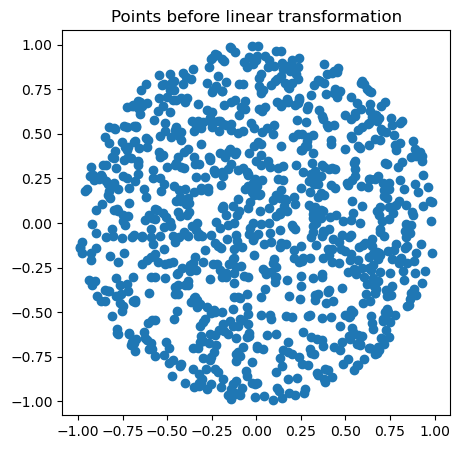

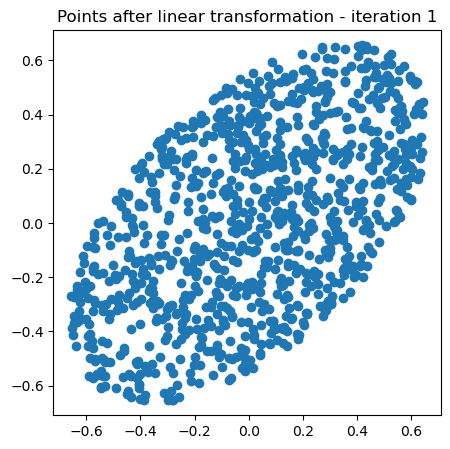

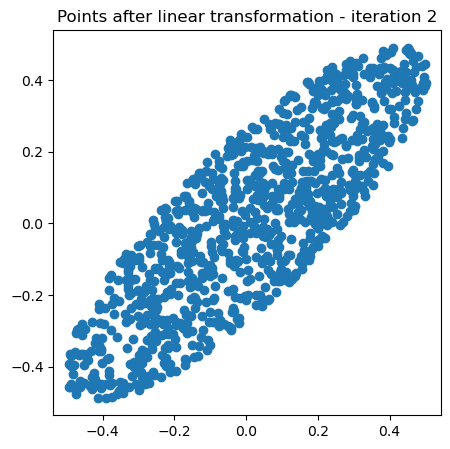

In [213]:
def random_points_disk(n, r=1):
    """Generate n random points within a disk of radius r"""
    theta = np.random.uniform(0, 2 * np.pi, n)
    r = np.sqrt(np.random.uniform(0, r**2, n)) # notice the sqrt
    x, y = r * np.cos(theta), r *  np.sin(theta)
    return np.vstack((x, y)).T



pts = np.array(random_points_disk(1000))
plt.figure(figsize=(5, 5))
plt.scatter(pts[:,0], pts[:,1])
plt.axis('equal')
plt.title("Points before linear transformation")

# Define a random linear transformation
np.random.seed(0)
A = np.random.uniform(-1, 1, size=(2, 2)) # random 2x2 matrix with entries in [-1, 1]
A = A + A.T # symmetrize matrix to make it Hermitian

# Apply the transformation
pts = pts @ A

plt.figure(figsize=(5,5))
plt.scatter(pts[:,0], pts[:,1])
plt.axis('equal')
plt.title("Points after linear transformation - iteration 1")

# Apply the transformation again
pts = pts @ A

plt.figure(figsize=(5,5))
plt.scatter(pts[:,0], pts[:,1])
plt.axis('equal')
plt.title("Points after linear transformation - iteration 2")

Text(0.5, 1.0, 'Points after many linear transformations')

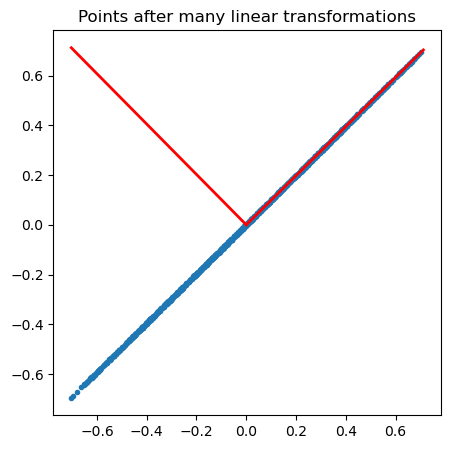

In [84]:


pts = np.array(random_points_disk(1000))
all_pts = [np.copy(pts)]
for _ in range(10):
    pts = pts @ A
    all_pts.append(np.copy(pts))

eig_vals, eig_vecs = np.linalg.eig(A)

total_scale = eig_vals[0]**10

plt.figure(figsize=(5,5))
plt.plot(pts[:, 0] / total_scale, pts[:, 1] / total_scale, '.')
plt.axis('equal')

eig_vec1 = eig_vecs[:, 0]
eig_vec2 = eig_vecs[:, 1]
plt.plot([0, eig_vec1[0]], [0, eig_vec1[1]], 'r', lw=2)
plt.plot([0, eig_vec2[0]], [0, eig_vec2[1]], 'r', lw=2)
plt.title("Points after many linear transformations, scaled")



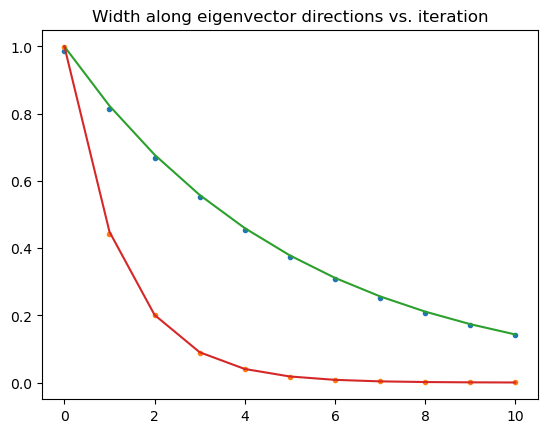

In [107]:
plt.plot(np.max(np.array(all_pts) @ eig_vec1, axis=-1), '.')
plt.plot(np.max(np.array(all_pts) @ eig_vec2, axis=-1), '.')
plt.title("Width along eigenvector directions vs. iteration")


plt.plot(np.exp(np.log(eig_vals[0]) * np.arange(11)))
plt.plot(np.exp(np.log(-eig_vals[1]) * np.arange(11)))

In [214]:
## Make an interactive video
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets

def plotter(i):
    
    total_scale = eig_vals[0]**i
    pts = all_pts[i]

    plt.figure(figsize=(5,5))
    plt.plot(pts[:, 0] / total_scale, pts[:, 1] / total_scale, '.')
    plt.plot([0, eig_vec1[0]], [0, eig_vec1[1]], 'r', lw=2)
    plt.plot([0, eig_vec2[0]], [0, eig_vec2[1]], 'r', lw=2)
    plt.show()

interact(
    plotter, 
    i=widgets.IntSlider(0, 0, 10, 1, layout=Layout(width='800px'))
)

interactive(children=(IntSlider(value=0, description='i', layout=Layout(width='800px'), max=10), Output()), _d…

<function __main__.plotter(i)>

## What am I leaving out?

+ Non-Hermitian matrices rotate their input space, in addition to anisotopically squeezing it
+ A hot topic of research in stat mech and active matter theory; these describe non-reciprocal interactions (broken detailed balance if the matrix describes kinetics, "odd" elasticity, etc)

## What do we do with non-square matrices? Singular Value Decomposition


+ $A \in \mathbb R^{N \times M}$. 
+ + For example, if we have a video of a fluid flow or sensor readings, we might have $N$ observations from $M$ sensors/pixels
+ $A$ can be overdetermined ($N > M$) or underdetermined ($N < M$). 
+ However, we can instead calculate the eigenspectrum of the square matrices $A^\dagger A$ or $A A^\dagger$,
+ We refer to the eigenvectors as the "right" or "left" singular vectors, respectively, and their associated eigenvalues are called the singular values. $$ A = U \Sigma V^\dagger $$ where the columns of $U$ are the right singular vectors, the columns of $V$ are the left singular vectors, and $\Sigma$ is a square diagonal matrix with the eigenvalues along the diagonal. Since the eigenvalues and eigenvectors can be listed in any order, by convention we normally list the elements in descending order of eigenvalue magnitude.
+ Decompose a dataset into characteristic directions in rowspace (left eigenvectors) and characteristic directions in columnspace (right eigenvectors)


+ Unlike traditional eigenvalue decomposition, SVD applies to non-square matrices
+ Different interpretations: (1) Geometric, (2) Dynamical, (3) Data compression, pattern discovery


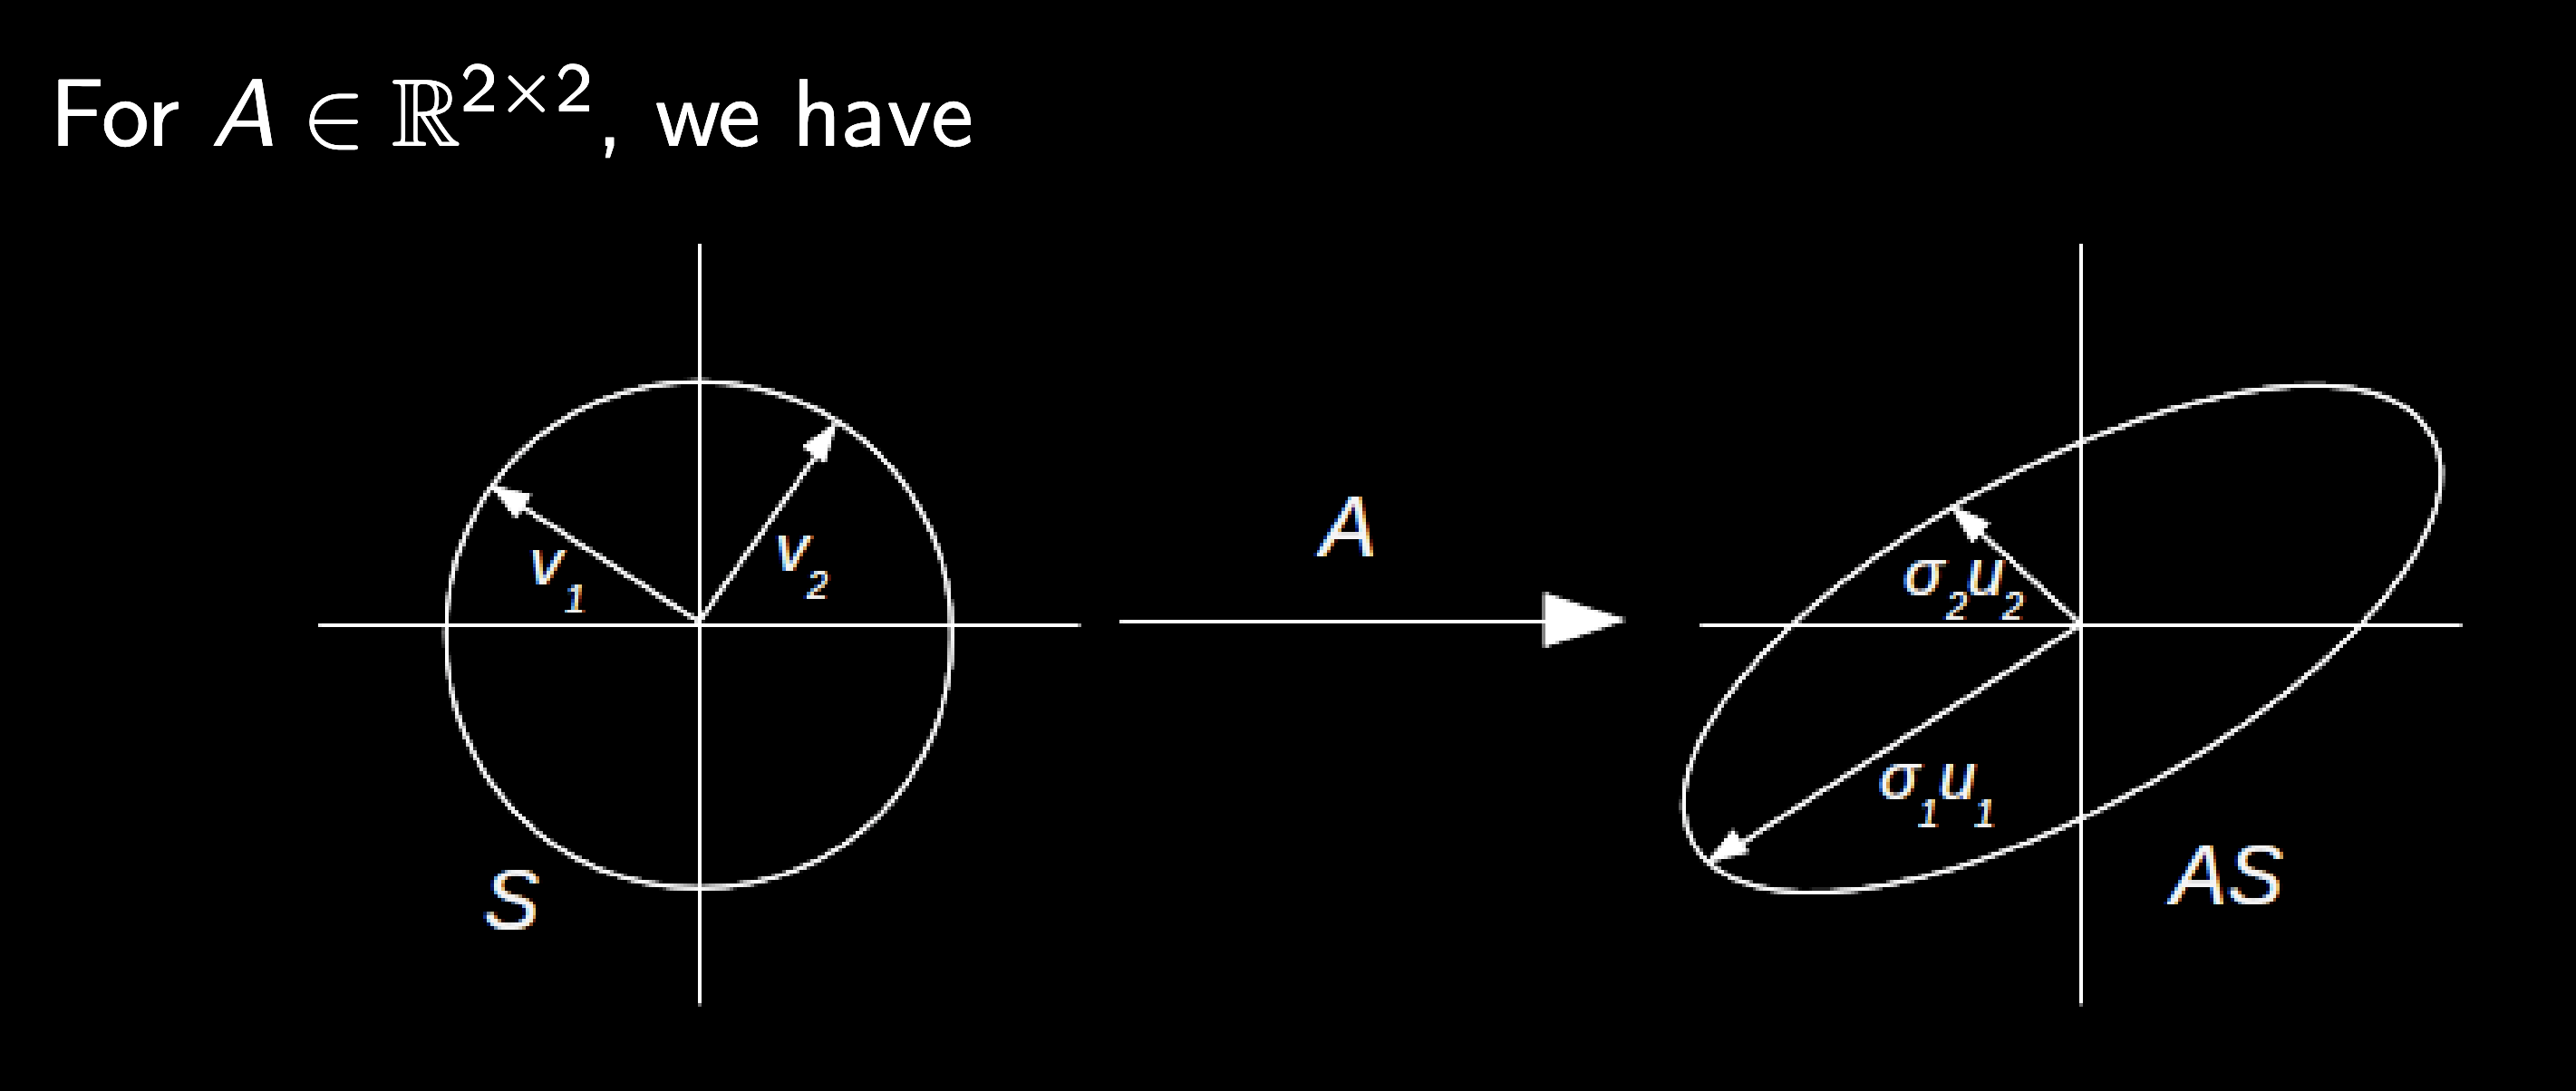

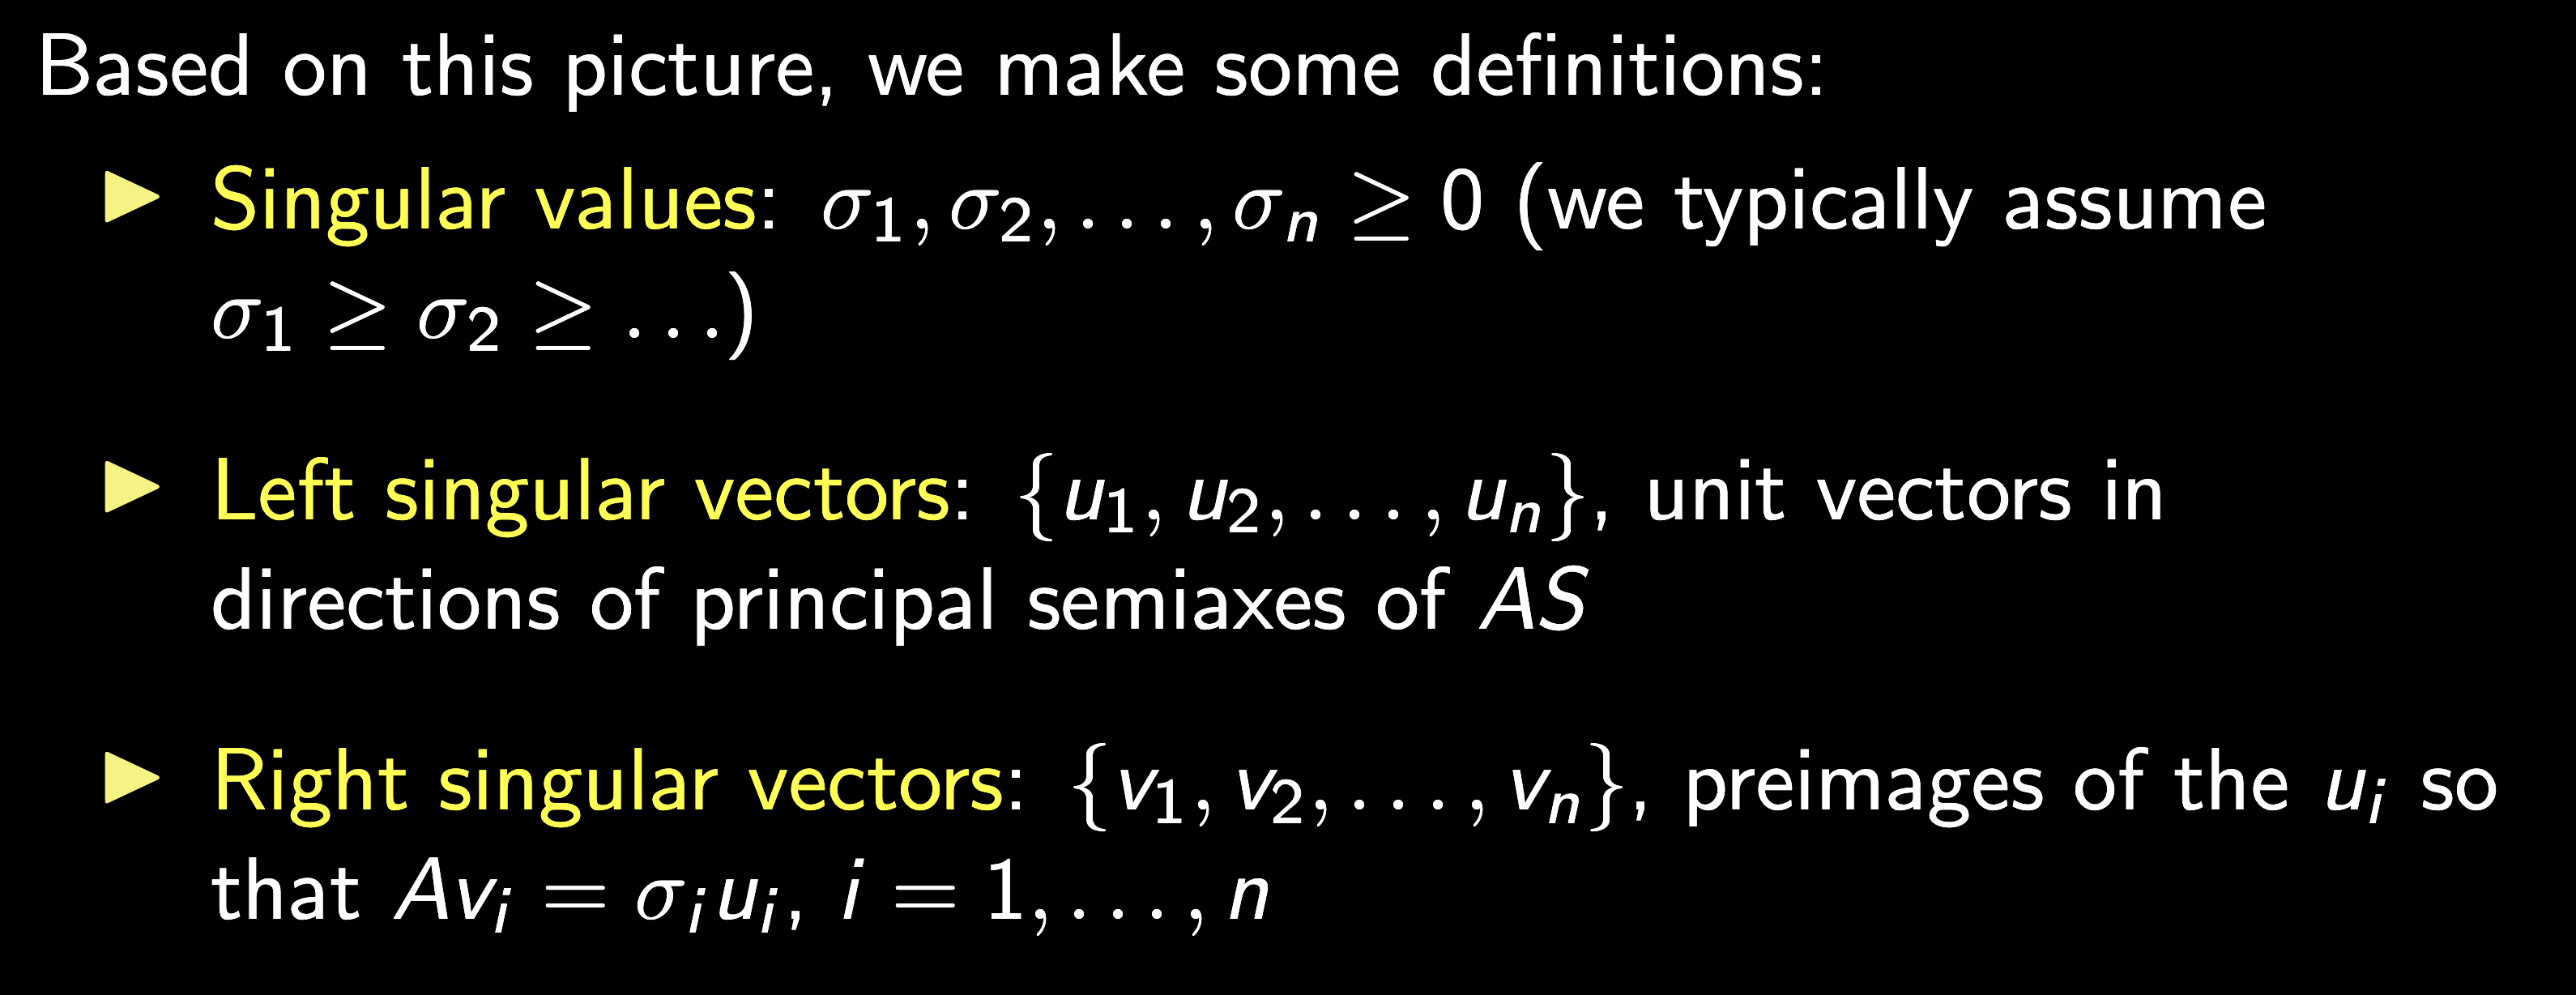

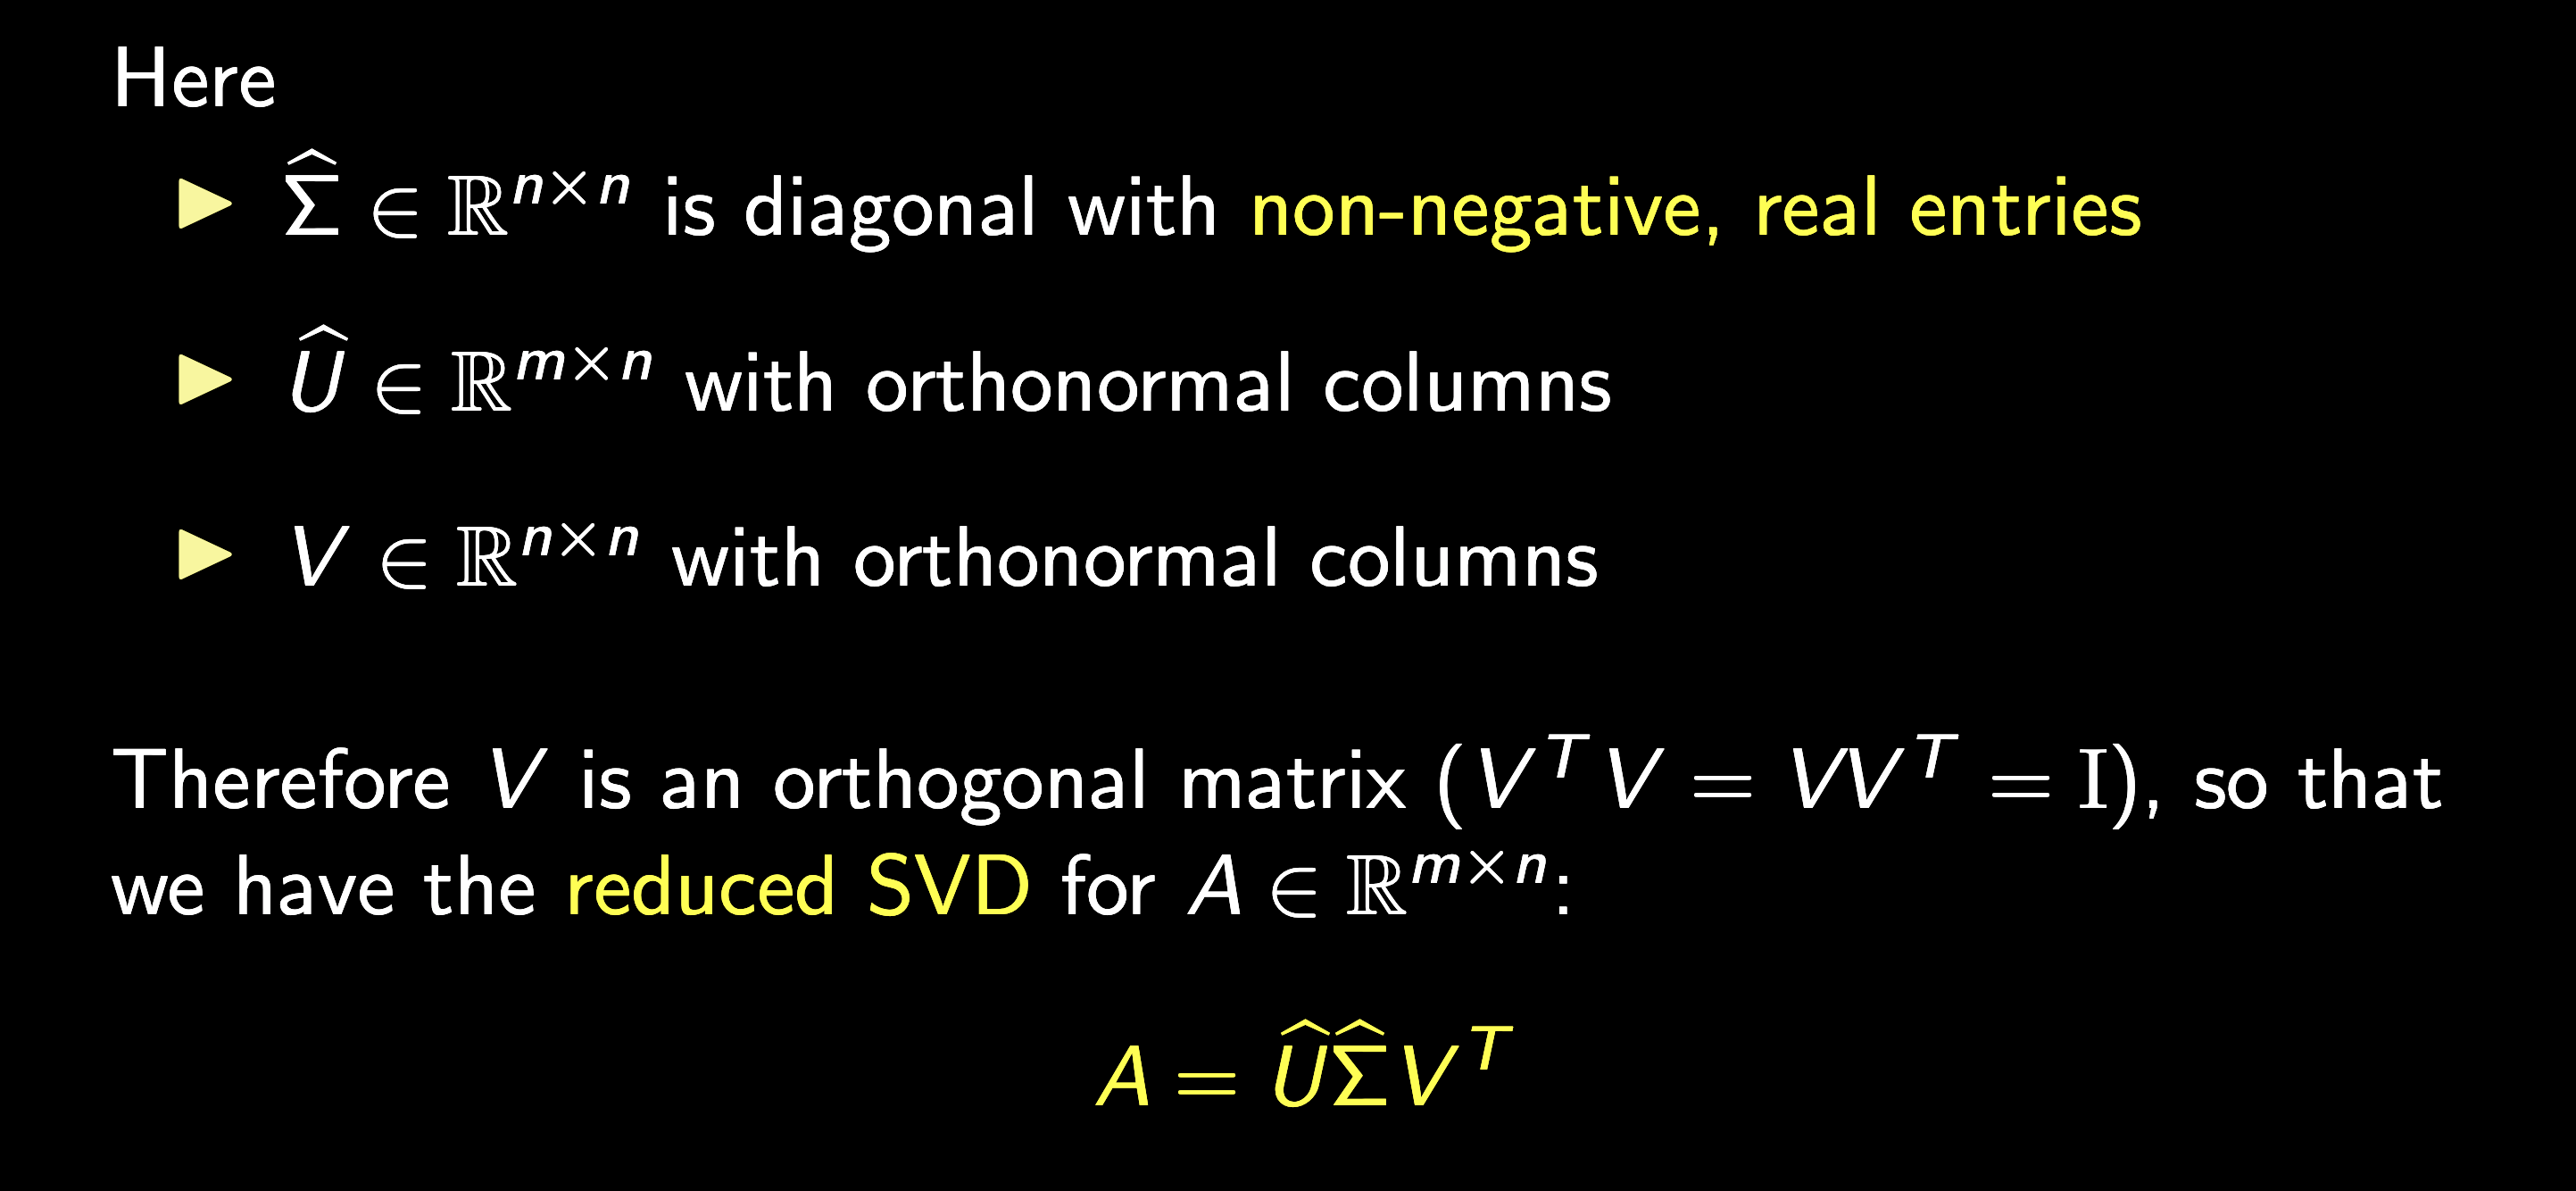

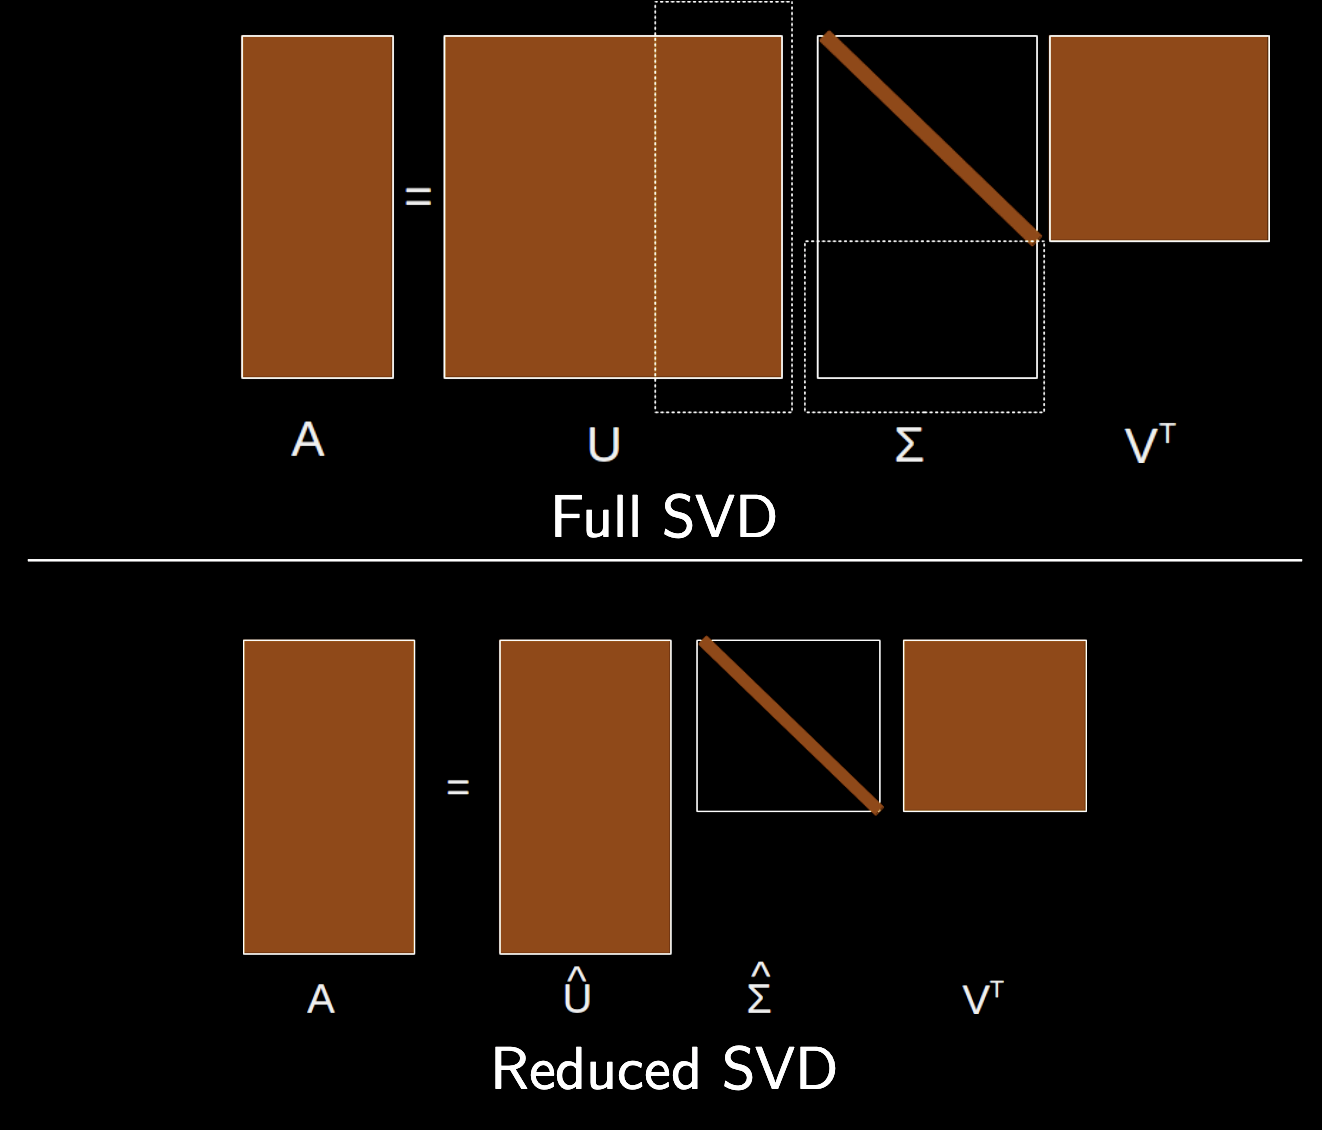

In [176]:

images = [
    Image(filename='../resources/svd_pic.png', width=800), 
    Image(filename='../resources/svd_defs.png', width=800),
    Image(filename='../resources/svd_eq.png', width=800),
    Image(filename='../resources/full_reduced_svd.png', width=800)
]
## Source: Chris Rycroft's AM205 class
display(*images)



# Dynamical systems interpretation of SVD

+ + In dynamical systems, we might have skew-product structure, where the dynamics of some variables depend only on a subset of the others
$$
\begin{cases} 
      x_{t + 1} \!&=& 4 x_t + y_t + 3 z_t \\
      y_{t + 1} \!&=& x_t + 2 y_t + 2 z_t \\
     z_{t + 1} \!&=& f(z_t, t)
   \end{cases}
$$

Examples: $f(z_t) = z_t + c$ is a a time like variable,  $f(z_t) = \eta$ is a random number generator (like we saw for the Ornstein-Uhlenbeck simulation); $f(z_t) = \sin(\omega t)$ is a periodic driver.

Can write this system has rectangular structure
$$
\begin{bmatrix}
x_{t}\\
y_{t}
\end{bmatrix}
= 
\begin{bmatrix}
4 & 1 & 3\\
1 & 2 & 2 
\end{bmatrix}
\begin{bmatrix}
x_{t}\\
y_{t} \\ 
z_{t}
\end{bmatrix}
$$
Our analogy to square matrix dynamics is now a bit more involved, because we can't iterate the system repeatedly without knowing the sequence of $z_t$ values. Notice that if the coupling to the $z$ driver system is zero, then our square "response" subsystem represents an autonomous linear system with Hermitian structure: $x$ affects $y$ as much as $y$ affects $x$/

We can't do any spectral analysis anymore, because our coefficient matrix $A \in \mathbb{2 \times 3$. However, we can instead analyze the two square matrices $AA^\dagger \in \mathbb{2 \times 2}$ and $A^\dagger A \in \mathbb{3 \times 3}$. This is like analyzing two iterations of a square dynamical system.






In [165]:

a_response = np.array([[4, 1], [1, 2]]).T
print("Two iterations of square response subsystem without driving:")
print(a_response @ a_response.T, end='\n\n')
# print(a_response.T @ a_response, end='\n\n')

# Decoupled limit
a_full = np.array([[4, 1, 0], [1, 2, 0]]).T
print("Left matrix product with zero driving:")
print(a_full @ a_full.T, end='\n\n')
# print(a_full.T @ a_full, end='\n\n')


# Coupled limit
print("Left matrix product with driving:")
a_full = np.array([[4, 1, 3], [1, 2, 2]]).T
print(a_full @ a_full.T, end='\n\n')


Two iterations of square response subsystem without driving:
[[17  6]
 [ 6  5]]

Left matrix product with zero driving:
[[17  6  0]
 [ 6  5  0]
 [ 0  0  0]]

Left matrix product with driving:
[[17  6 14]
 [ 6  5  7]
 [14  7 13]]



Loosely, the left matrix as propagation of an impulse in $z$ across the response subsystem (coupling of dynamical variables to the driver. Tells us about the dependence of response variables on earlier values

In [164]:

a_response = np.array([[4, 1], [1, 2]]).T
print("Two iterations of transpose of square response subsystem without driving:")
print(a_response.T @ a_response, end='\n\n')
# print(a_response.T @ a_response, end='\n\n')


# Decoupled limit
a_full = np.array([[4, 1, 0], [1, 2, 0]]).T
print("Right matrix product with zero driving:")
print(a_full.T @ a_full, end='\n\n')
# print(a_full.T @ a_full, end='\n\n')


# Coupled limit
print("Right matrix product with driving:")
a_full = np.array([[4, 1, 3], [1, 2, 2]]).T
print(a_full.T @ a_full, end='\n\n')

Two iterations of transpose of square response subsystem without driving:
[[17  6]
 [ 6  5]]

Right matrix product with zero driving:
[[17  6]
 [ 6  5]]

Right matrix product with driving:
[[26 12]
 [12  9]]



Loosely, the right matrix tells us about the driver system. If the driver couplings have the form $b = [3, 2]$, then the right matrix is perturbed by elementwise-adding the structured matrix $b b^T$ to the right matrix. The diagonal elements tell us something about how much the different dynamical variables are affected
+ This approach might remind you of density matrices


In [175]:
bias = np.array([2, 3])[:, None]
print(bias @ bias.T, end='\n\n')

[[4 6]
 [6 9]]



In [168]:
print(a_full.T @ a_full - a_response.T @ a_response, end='\n\n')

[[9 6]
 [6 4]]



## Data representation and compression views

+ $A \in \mathbb R^{N \times M}$ is a data matrix, where we have $N$ observations of an $M$ dimensional process. Examples include a video ($N$ is number of frames, $M$ is number of pixels), or a collection of $N$ points in $3D$ space ($M = 3$)
+ The left eigenvectors give characteristic "modes" in the data; they have the same dimensionality. The right eigenvectors give us the characteristic "loadings" 
+ SVD can be used to reduce the dimensionality of a problem by truncating relevant eigenvalues; a basic compression method for high-dimensional data
+ The eigenvalue spectrum provides a clue into the dimensionality of the underlying data generating process

Important: SVD applies to any rectangular matrix. We can reconstruct individual images by treating them as collections of columns, and reconstructing by adding together subsets of characteristic columns

Image shape is (372, 248)


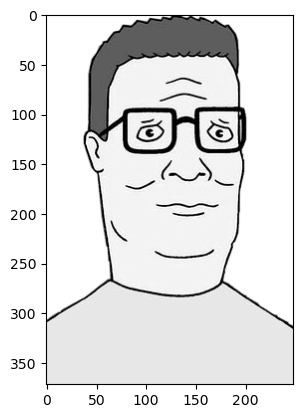

In [201]:
from PIL import Image as img

# Open the image
im = img.open("../resources/hank.png")

# convert to a numpy image using just the red channel
im = np.array(im)[..., 0]
print("Image shape is", im.shape)
plt.imshow(im, cmap='gray')

U shape is (372, 372)
s shape is (248,)
V shape is (248, 248)


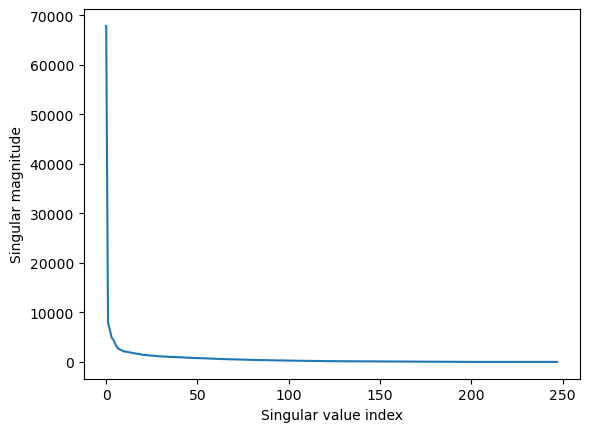

In [202]:
# Perform SVD on the image

U, s, V = np.linalg.svd(im)
print("U shape is", U.shape)
print("s shape is", s.shape)
print("V shape is", V.shape)
plt.plot(s)
plt.xlabel("Singular value index");
plt.ylabel("Singular magnitude");

Us shape is (372, 20)
ss shape is (20, 20)
Vs shape is (20, 248)
Approximation shape is (372, 248)


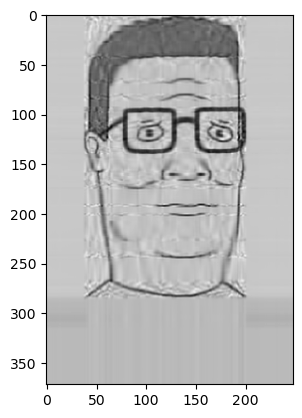

In [204]:
Us = U[:, :20]
ss = np.diag(s[:20])
Vs = V[:20, :]
print("Us shape is", Us.shape)
print("ss shape is", ss.shape)
print("Vs shape is", Vs.shape)

im_approx = Us @ ss @ Vs
print("Approximation shape is", im_approx.shape)
plt.imshow(im_approx, cmap='gray')

In [208]:
## Make an interactive video
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets

def plotter(i):
    
    Us = U[:, :i]
    ss = np.diag(s[:i])    
    Vs = V[:i, :]

    im_approx = Us @ ss @ Vs
    plt.imshow(im_approx, cmap='gray')
    plt.show()

interact(
    plotter, 
    i=widgets.IntSlider(0, 1, V.shape[0], 1, layout=Layout(width='800px'))
)

interactive(children=(IntSlider(value=1, description='i', layout=Layout(width='800px'), max=248, min=1), Outpu…

<function __main__.plotter(i)>